In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from sklearn.decomposition import PCA

In [15]:
from google.colab import files
uploaded=files.upload()

Saving sources.csv to sources.csv


In [0]:
import io
su=pd.read_csv(io.BytesIO(uploaded['sources.csv']))

In [17]:
from google.colab import files
uploaded=files.upload()

Saving waves.csv to waves.csv


In [0]:
su1=pd.read_csv(io.BytesIO(uploaded['waves.csv']))

In [0]:
su=pd.concat([su,su1],axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
su.iloc[:,0] = le.fit_transform(su.iloc[:,0]).astype('float64')

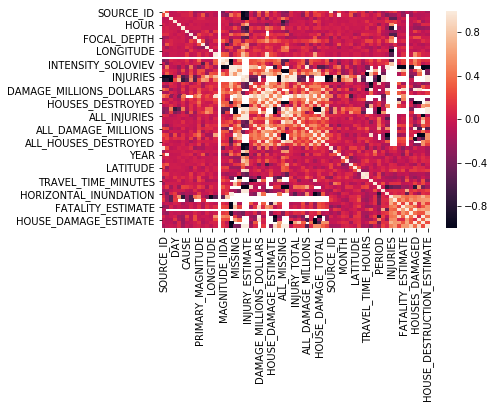

In [21]:
corr = su.corr()
import seaborn as sns
sns.heatmap(corr)

In [0]:
su.fillna(0,inplace=True)
su=su.drop(['COUNTRY','LOCATION','STATE/PROVINCE','FIRST_MOTION'],axis=1)
tsu=su.drop(['VALIDITY'],axis=1)

In [23]:
su = su.loc[:,~su.columns.duplicated()]
su.dtypes

SOURCE_ID                     float64
YEAR                          float64
MONTH                         float64
DAY                           float64
HOUR                          float64
MINUTE                        float64
CAUSE                         float64
VALIDITY                      float64
FOCAL_DEPTH                   float64
PRIMARY_MAGNITUDE             float64
REGION_CODE                   float64
LATITUDE                      float64
LONGITUDE                     float64
MAXIMUM_HEIGHT                float64
MAGNITUDE_ABE                 float64
MAGNITUDE_IIDA                float64
INTENSITY_SOLOVIEV            float64
WARNING_STATUS                float64
MISSING                       float64
MISSING_ESTIMATE              float64
INJURIES                      float64
INJURY_ESTIMATE               float64
FATALITIES                    float64
FATALITY_ESTIMATE             float64
DAMAGE_MILLIONS_DOLLARS       float64
DAMAGE_ESTIMATE               float64
HOUSES_DAMAG

In [0]:
#Data preprocessing
from sklearn.model_selection import train_test_split
X=su.iloc[:,:-1]
y=su['REGION_CODE']
scale=StandardScaler()
Xn=scale.fit_transform(X)
pca=PCA(n_components=10)
Xs=pca.fit_transform(Xn)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size = 0.33, random_state=42)

In [72]:
#decisiontree classification
from sklearn.tree import DecisionTreeClassifier
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree.fit(X_train,y_train)
print("Accuracy",loanTree.score(X_test, y_test))

Accuracy 0.9316525962761651


In [73]:
#classification report
y_predicted=loanTree.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7828
        30.0       0.00      0.00      0.00         3
        40.0       0.00      0.00      0.00         7
        50.0       0.37      0.71      0.49       156
        60.0       0.13      0.61      0.22        51
        71.0       0.00      0.00      0.00         4
        73.0       0.00      0.00      0.00        42
        74.0       0.00      0.00      0.00        30
        75.0       0.00      0.00      0.00        13
        76.0       0.00      0.00      0.00         1
        77.0       0.00      0.00      0.00         4
        80.0       0.00      0.00      0.00         7
        81.0       0.00      0.00      0.00        46
        82.0       0.00      0.00      0.00        56
        83.0       0.00      0.00      0.00        35
        84.0       0.00      0.00      0.00        52
        85.0       0.39      0.58      0.47       118
        86.0       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, y_predicted)
print(results)

[[7828    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0    1    1    0    0    0    0    0    0    0    0    0
     0    0    1    0    0    0    0]
 [   0    0    0    4    2    0    0    0    0    0    0    0    0    0
     0    0    1    0    0    0    0]
 [   0    0    0  110   29    0    0    0    0    0    0    0    0    0
     0    0    8    0    0    9    0]
 [   0    0    0    9   31    0    0    0    0    0    0    0    0    0
     0    0    8    0    0    3    0]
 [   0    0    0    2    2    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0]
 [   0    0    0   24    2    0    0    0    0    0    0    0    0    0
     0    0    2    0    0   14    0]
 [   0    0    0   11    7    0    0    0    0    0    0    0    0    0
     0    0    4    0    0    8    0]
 [   0    0    0    6    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    7    0]
 [   0    

In [0]:
#ANN implementation
import random
from keras.models import Sequential
from numpy.random import seed
from tensorflow import set_random_seed
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    seed(42)
    set_random_seed(42)
   
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [76]:
from keras.layers import Activation, Dense
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_175 (Dense)            (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [78]:
val_acc = np.mean(training.history['val_acc'])
print("\n%s: %.2f%%" % ('val_acc', val_acc*100))


val_acc: 89.59%


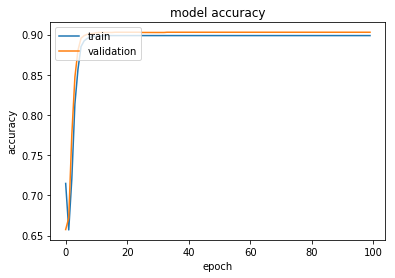

In [79]:
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [80]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [32,64]
epochs = [50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] batch_size=32, epochs=50 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... batch_size=32, epochs=50, total=  42.6s
[CV] batch_size=32, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.6s remaining:    0.0s


[CV] ......................... batch_size=32, epochs=50, total=  43.5s
[CV] batch_size=32, epochs=50 ........................................
[CV] ......................... batch_size=32, epochs=50, total=  43.1s
[CV] batch_size=64, epochs=50 ........................................
[CV] ......................... batch_size=64, epochs=50, total=  25.7s
[CV] batch_size=64, epochs=50 ........................................
[CV] ......................... batch_size=64, epochs=50, total=  26.2s
[CV] batch_size=64, epochs=50 ........................................
[CV] ......................... batch_size=64, epochs=50, total=  25.9s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.4min finished


In [86]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.899749 using {'opt': 'Adagrad'}
0.899749 (0.001629) with: {'opt': 'Adagrad'}
0.899749 (0.001629) with: {'opt': 'Adadelta'}
0.899749 (0.001629) with: {'opt': 'Adam'}


In [81]:
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['Adagrad', 'Adadelta', 'Adam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=  44.2s
[CV] opt=Adagrad .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   44.2s remaining:    0.0s


[CV] ...................................... opt=Adagrad, total=  44.0s
[CV] opt=Adagrad .....................................................
[CV] ...................................... opt=Adagrad, total=  45.3s
[CV] opt=Adadelta ....................................................
[CV] ..................................... opt=Adadelta, total=  46.9s
[CV] opt=Adadelta ....................................................
[CV] ..................................... opt=Adadelta, total=  45.9s
[CV] opt=Adadelta ....................................................
[CV] ..................................... opt=Adadelta, total=  46.4s
[CV] opt=Adam ........................................................
[CV] ......................................... opt=Adam, total=  46.9s
[CV] opt=Adam ........................................................
[CV] ......................................... opt=Adam, total=  47.3s
[CV] opt=Adam ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  6.9min finished


In [87]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.899749 using {'opt': 'Adagrad'}
0.899749 (0.001629) with: {'opt': 'Adagrad'}
0.899749 (0.001629) with: {'opt': 'Adadelta'}
0.899749 (0.001629) with: {'opt': 'Adam'}


In [88]:
model = create_model(lyrs=[8], dr=0.2)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_212 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_213 (Dense)            (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
training = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17556/17556 [==============================] - 1s 59us/step

acc: 89.96%


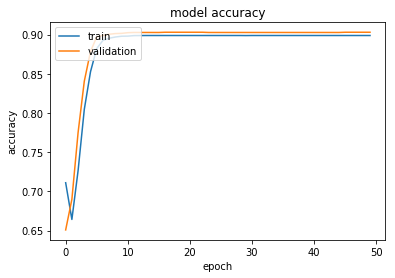

In [90]:
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()